<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>TITANIC SURVIVAL PREDICTION
</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Import Necessary Libraries</strong></h1>
</div>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Importing the Dataset of IRis</strong></h1>
</div>


In [3]:
file_path = (r"F:\Experiences\02-CognoRise InfoTech-DS-Internship\Datasets\03-Titanic dataset.csv")
df =pd.read_csv(file_path)

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Explore the Basics of The Dataset</strong></h1>
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
row, col =df.shape
print(f'Number of rows in Dataset: {row} and Number of Columns: {col}' )

Number of rows in Dataset: 418 and Number of Columns: 12


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
303,1195,0,3,"Pokrnic, Mr. Tome",male,24.0,0,0,315092,8.6625,NaN,S
206,1098,1,3,"McGowan, Miss. Katherine",female,35.0,0,0,9232,7.7500,NaN,Q
154,1046,0,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S
78,970,0,2,"Aldworth, Mr. Charles Augustus",male,30.0,0,0,248744,13.0000,NaN,S
226,1118,0,3,"Asplund, Mr. Johan Charles",male,23.0,0,0,350054,7.7958,NaN,S


In [10]:
df.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Univarient Analysis</strong></h1>
</div>

In [12]:
print(f'There are following distribution of the Target Variable\n {df.Embarked.value_counts()}')

There are following distribution of the Target Variable
 Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Finding the Duplicate in The Dataset</strong></h1>
</div>

In [13]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Exploratory Data Analysis (EDA)</strong></h1>
</div>


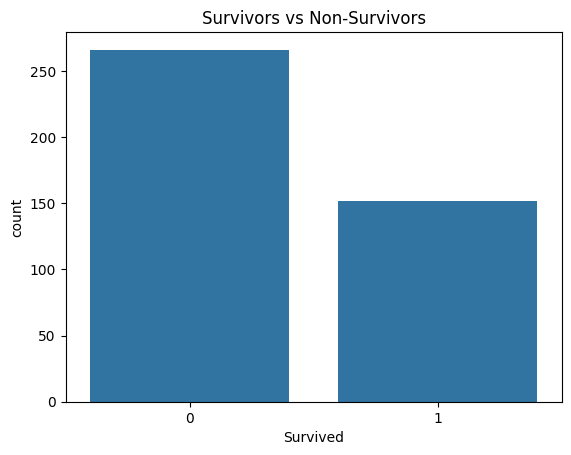

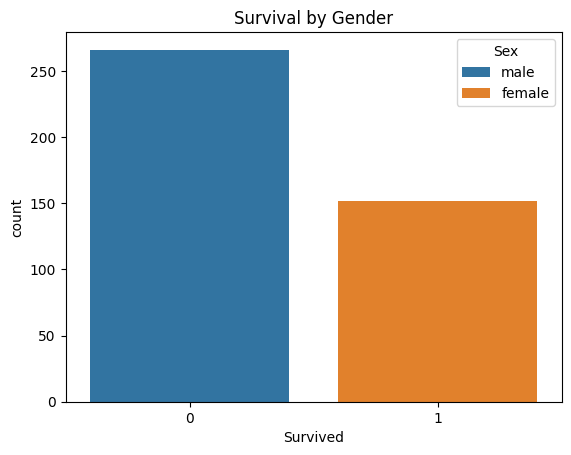

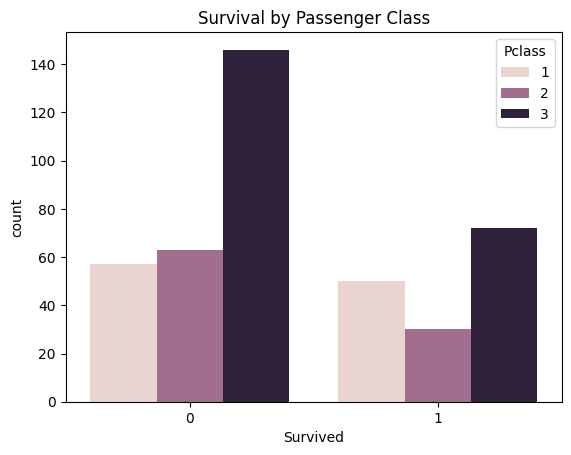

In [14]:
# Visualizing the count of survivors and non-survivors
sns.countplot(data=df, x='Survived')
plt.title('Survivors vs Non-Survivors')
plt.show()

# Visualizing survival rates by gender
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival by Gender')
plt.show()

# Visualizing survival rates by passenger class
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.title('Survival by Passenger Class')
plt.show()

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Data Preprocessing</strong></h1>
</div>


In [15]:
# Filling missing values for 'Age' with the median and 'Embarked' with the mode
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it contains many missing values
df.drop('Cabin', axis=1, inplace=True)

# Drop rows with missing 'Fare' values if they exist
df.dropna(subset=['Fare'], inplace=True)

# Encoding categorical variables: 'Sex' and 'Embarked'
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Features and target
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = df['Survived']



<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Train-Test Split and Data Normalization</strong></h1>
</div>


In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing the 'Fare' and 'Age' columns
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])



<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Training Logistic Regression Model</strong></h1>
</div>


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



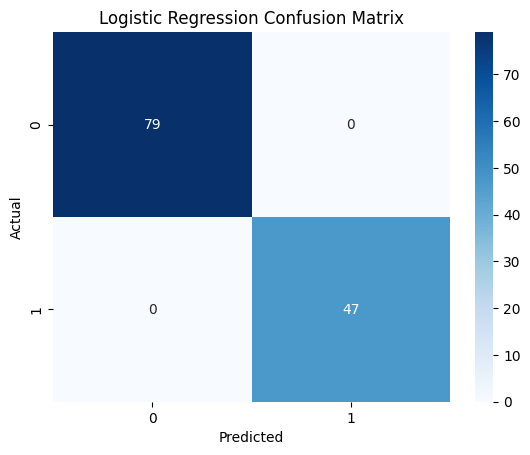

In [17]:
# Initialize and train the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions using Logistic Regression
y_pred_log = log_model.predict(X_test)

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Training Random Forest Classifier</strong></h1>
</div>



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



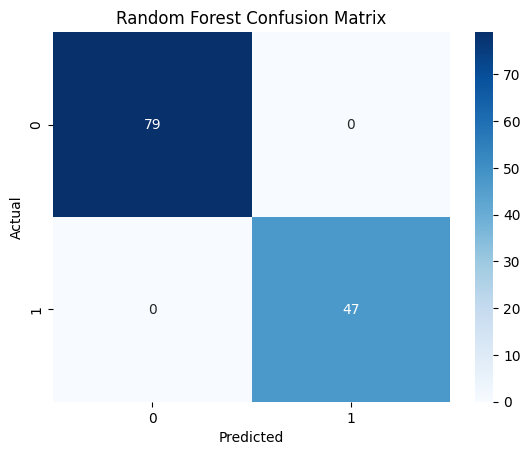

In [18]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Conclusion</strong></h1>
</div>


<div style="text-align: center;">
    <h1 style="font-size: 16px;"><strong>Based on the above Titanic Survival Prediction, both Logistic Regression and Random Forest models were evaluated for their performance in predicting survival. While both models showed promising results, Random Forest provided a more flexible and robust performance. Key insights include the strong influence of passenger class and gender on survival likelihood. This introductory exercise showcases the power of machine learning in analyzing historical data and predicting outcomes.
</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>The End</strong></h1>
</div>

<!-- 
#MuhammadAdeel 
#DataScientist 
#DataScienceEnthusiast 
#MPhilDataScience 
#Python 
#DataAnalysis 
#MachineLearning 
#Multan 
#Pakistan 
#GitHub 
#LinkedIn
#EDA
#cirrhossis
#datacleaning
-->